In [ ]:
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. 
These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees.
The main purpose of medical insurance is to receive the best medical care without any strain on your finances.
Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, 
domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,
,no of dependents ,smoker ,region  medical insurance is calculated .


In [ ]:
Columns                                            
•age: age of primary beneficiary
•sex: insurance contractor gender, female, male
•bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•children: Number of children covered by health insurance / Number of dependents
•smoker: Smoking
•region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading and Exploring the dataset
df = pd.read_csv(r'E:\python for data science\data trained\internship\projects\dataset4-main\medical_cost_insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
#Based on the results from info, we see that there are no null values in the data 
and the different data types of the columns

In [6]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Based on the results from describe, we also see these variables are at the top 
and more frequent in the dataset: male, non-smoker, southeast region

<AxesSubplot:xlabel='charges', ylabel='Density'>

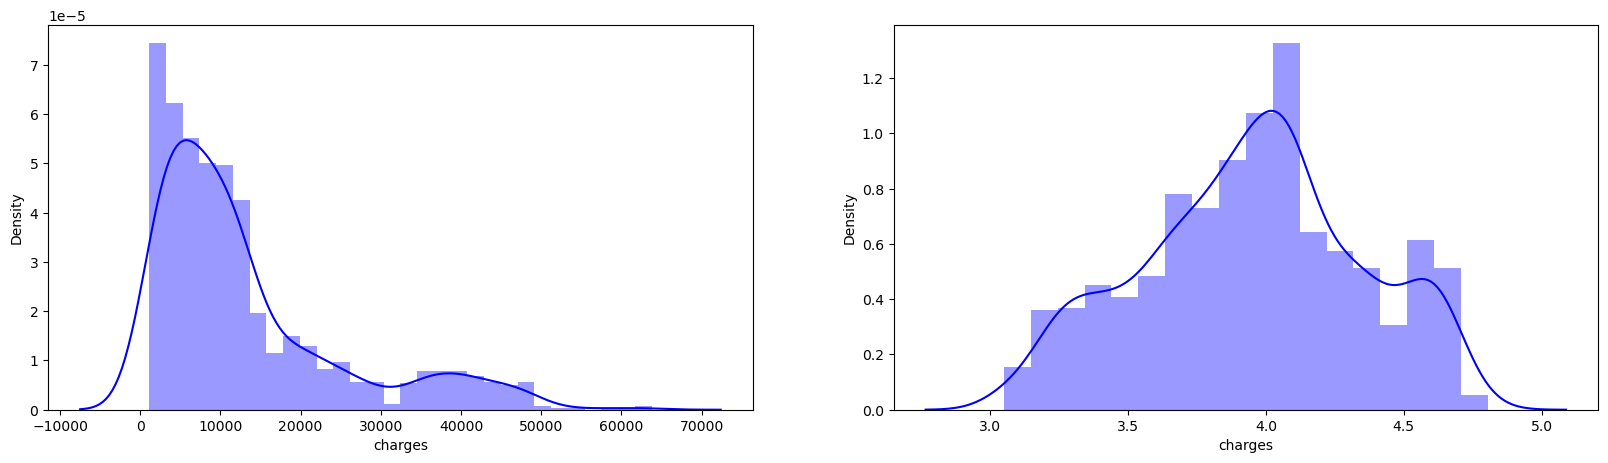

In [7]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'b')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

<AxesSubplot:xlabel='charges', ylabel='Density'>

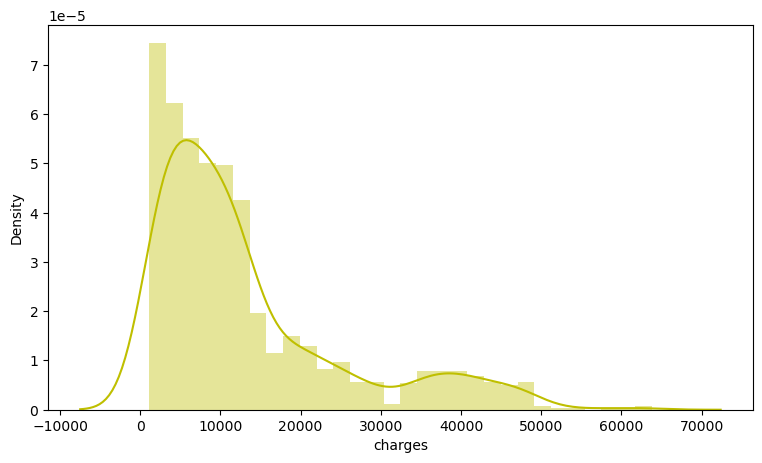

In [8]:
# Distribution of charges
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color='y')

<AxesSubplot:xlabel='charges', ylabel='Density'>

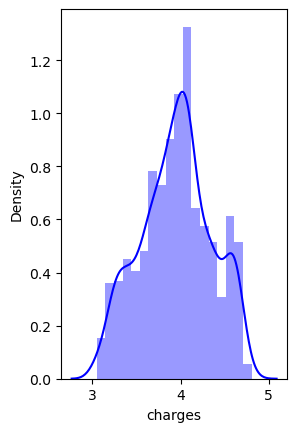

In [11]:
# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

# Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

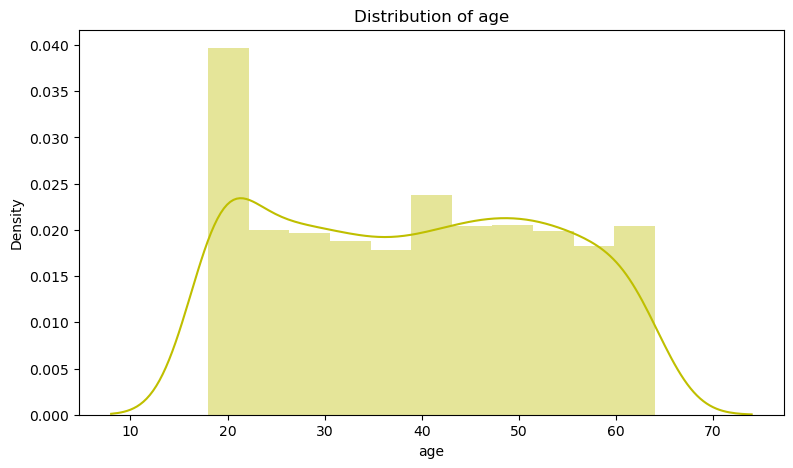

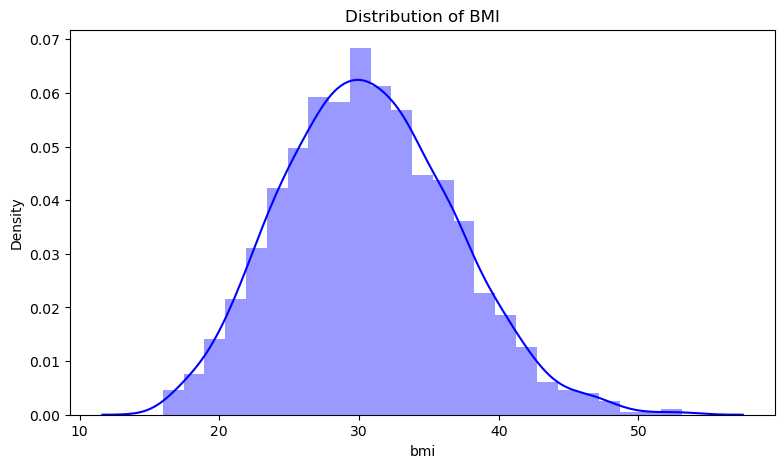

In [9]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color ='y').set_title('Distribution of age')
plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
sns.distplot(df.bmi, color='b').set_title('Distribution of BMI')

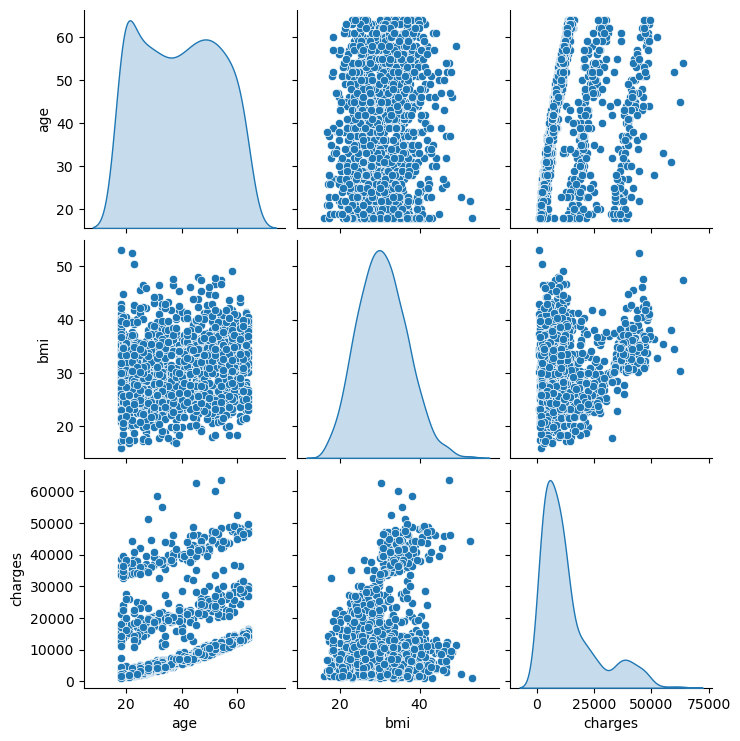

In [19]:
# Now we will check relationship between AGE BMI CHARGES
data=df[['age','bmi','charges']]
sns.pairplot(data, diag_kind='kde')
plt.show()

In [20]:
#The pairplot reveals that there is a linear relationship between age, bmi with charges

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
# Visualizing categorical variables individually vs medical charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

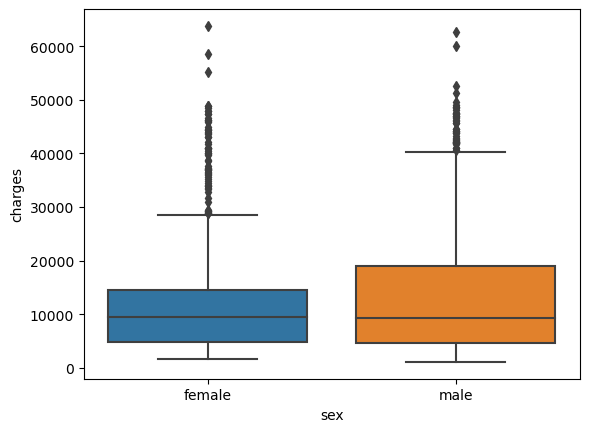

In [16]:
sns.boxplot(x = 'sex', y = 'charges', data = df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

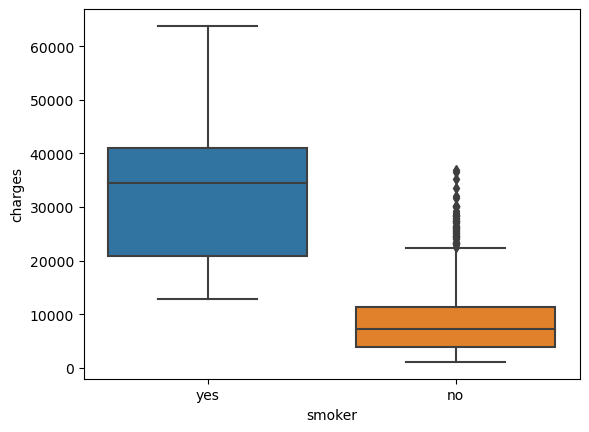

In [17]:
sns.boxplot(x ='smoker', y ='charges', data=df)

In [ ]:
Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, 
    in comparison to those that do not smoke

<AxesSubplot:xlabel='children', ylabel='charges'>

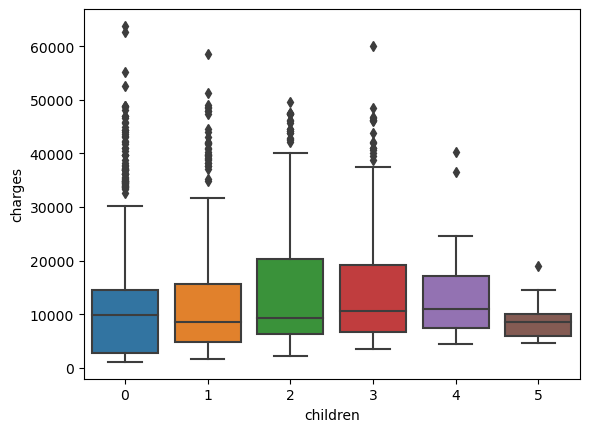

In [18]:
sns.boxplot(x ='children', y ='charges', data=df)

In [ ]:
Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.

<AxesSubplot:xlabel='region', ylabel='charges'>

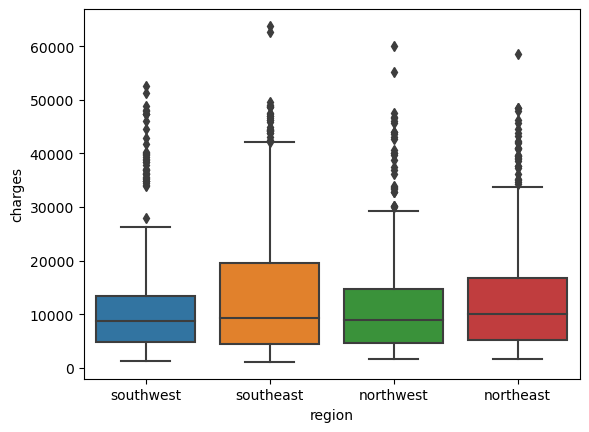

In [19]:
sns.boxplot(x ='region', y ='charges', data=df)

In [ ]:
Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.

In [ ]:
Now that we have looked at the effect of individual variables on medical charges, 
let's look at effect of a combination of factors on medical charges.

# Bi-Variate Analysis
Charges by region

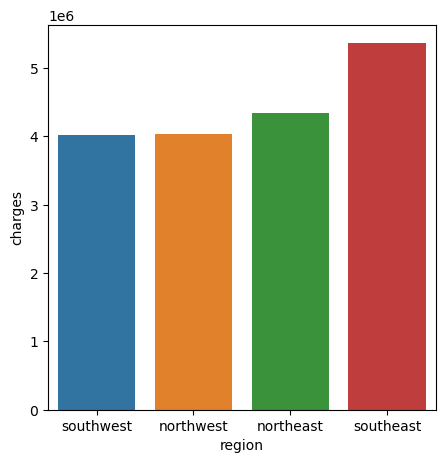

In [25]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(5,5))
ax = sns.barplot(x = charges.index, y = charges)

In [ ]:
The highest amount of charges are in the Southeast while the lowest are in the Southwest. 
Based on this, let's see how charges change by region when accounting for other factors,
such as number of children, gender, and smoking behavior.

<function matplotlib.pyplot.show(close=None, block=None)>

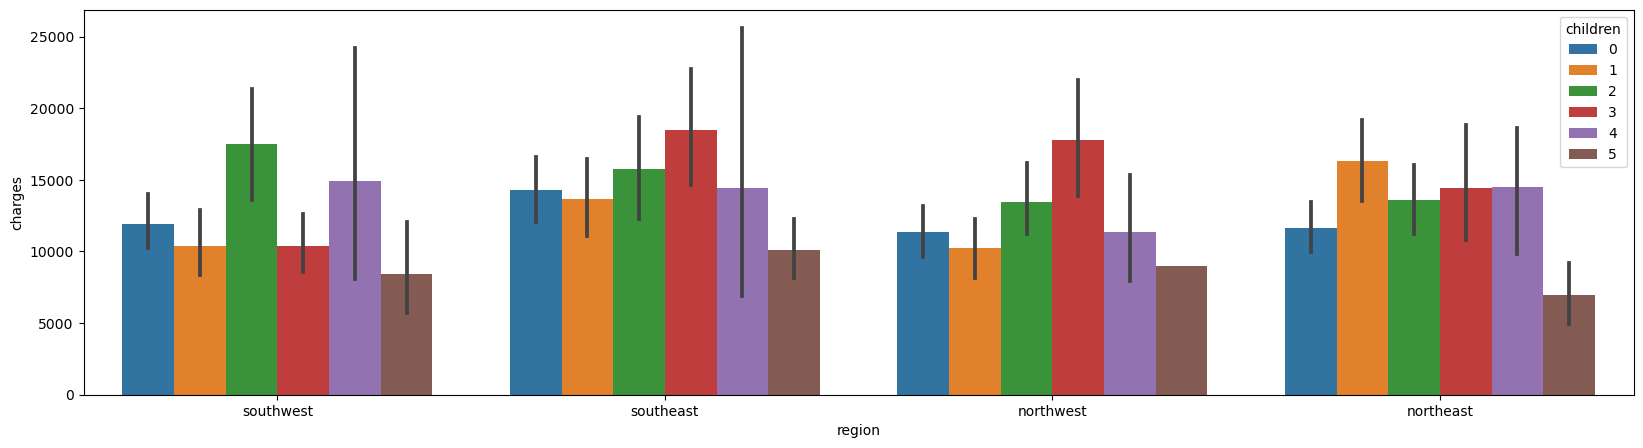

In [31]:
# Charges by region and number of children
plt.figure(figsize= (20,5))
sns.barplot(x= 'region', y= 'charges', hue='children',  data=df)
plt.show

In [ ]:
It seems that there is not a statistical difference in terms of
how the number of children in a particular region affects charges.

<function matplotlib.pyplot.show(close=None, block=None)>

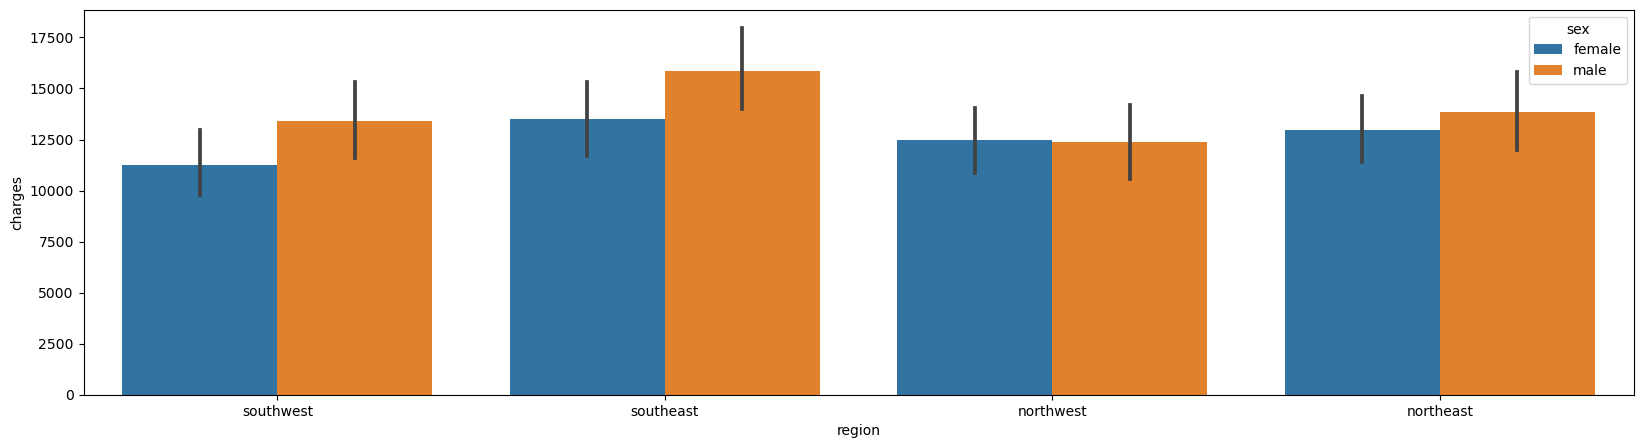

In [32]:
plt.figure(figsize= (20,5))
sns.barplot(x= 'region', y= 'charges', hue='sex',  data=df)
plt.show

In [ ]:
Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender 
in a particular region affects charges

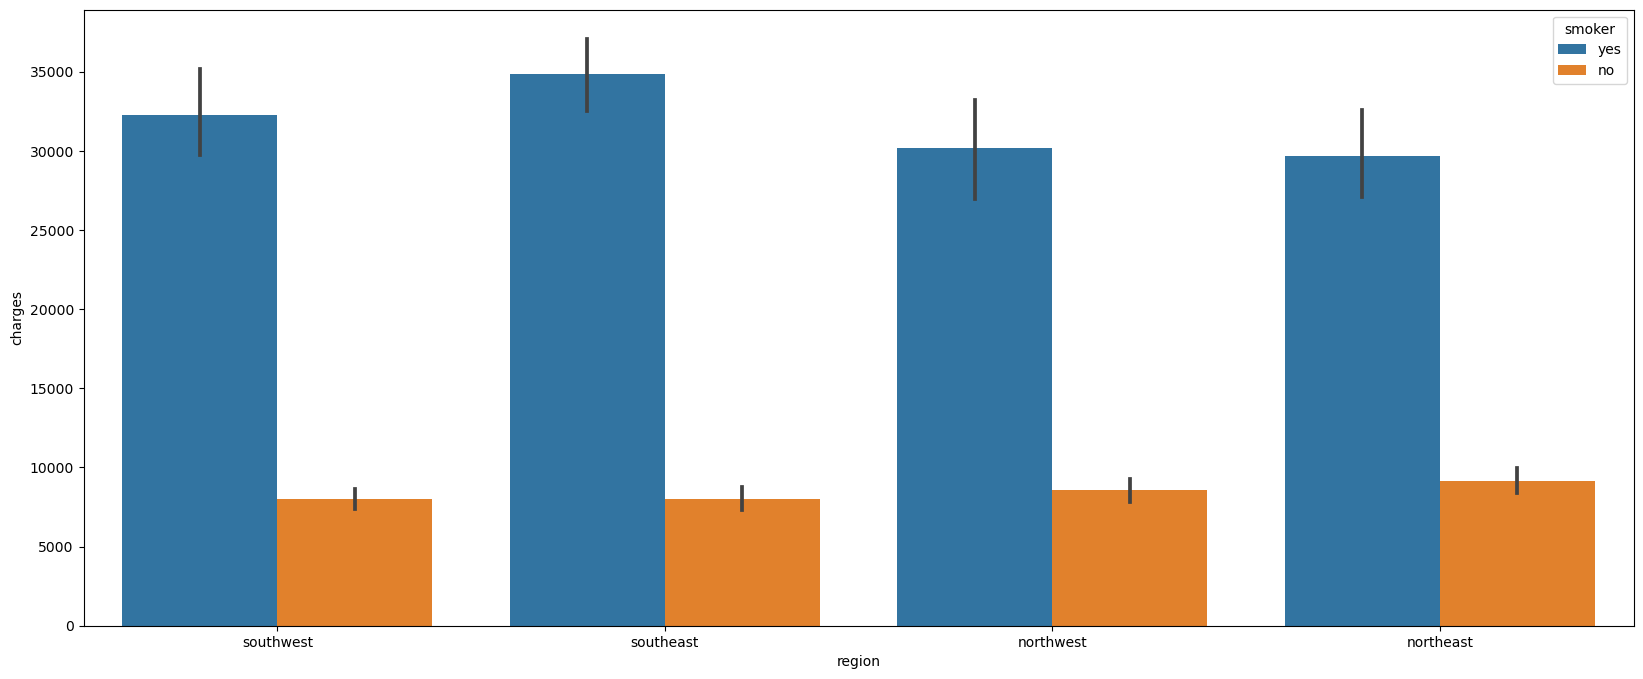

In [36]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, )

Text(0.5, 1.0, 'Age vs Medical charges')

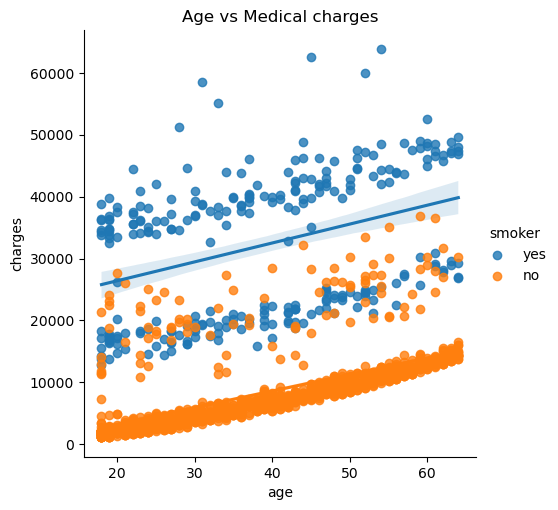

In [39]:
ax=sns.lmplot(x= 'age', y= 'charges', data=df, hue='smoker')
plt.title('Age vs Medical charges')

Text(0.5, 1.0, 'BMI VS Medical Charges')

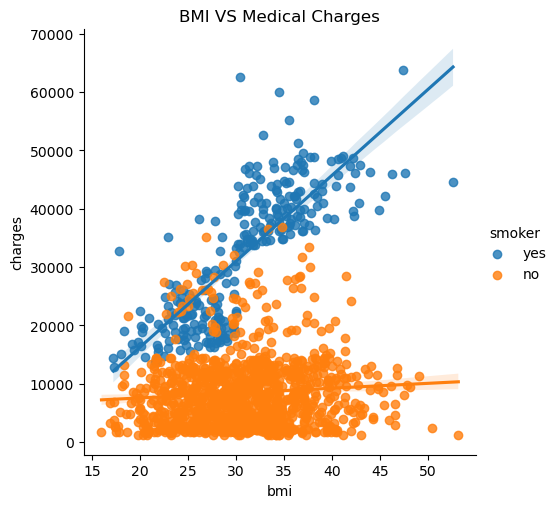

In [41]:
ax=sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')
plt.title('BMI VS Medical Charges')

Text(0.5, 1.0, 'Number of children vs Medical Charges')

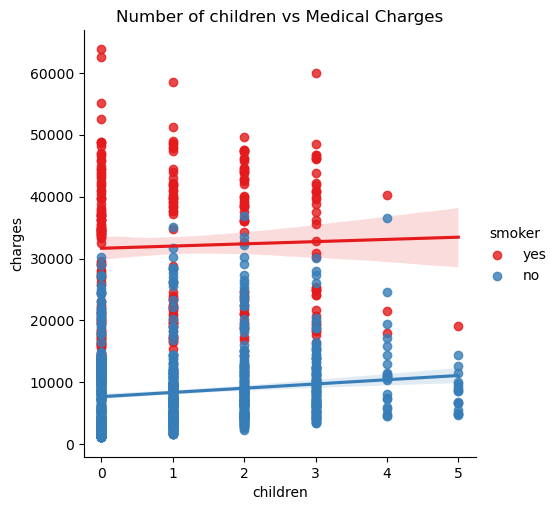

In [42]:
ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

In [ ]:
Based on the analysis,

We know that smoking has a great impact on medical costs.
Smoking in combination with an increase in other factors, 
such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

In [43]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [44]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [45]:
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

<Figure size 2500x5000 with 0 Axes>

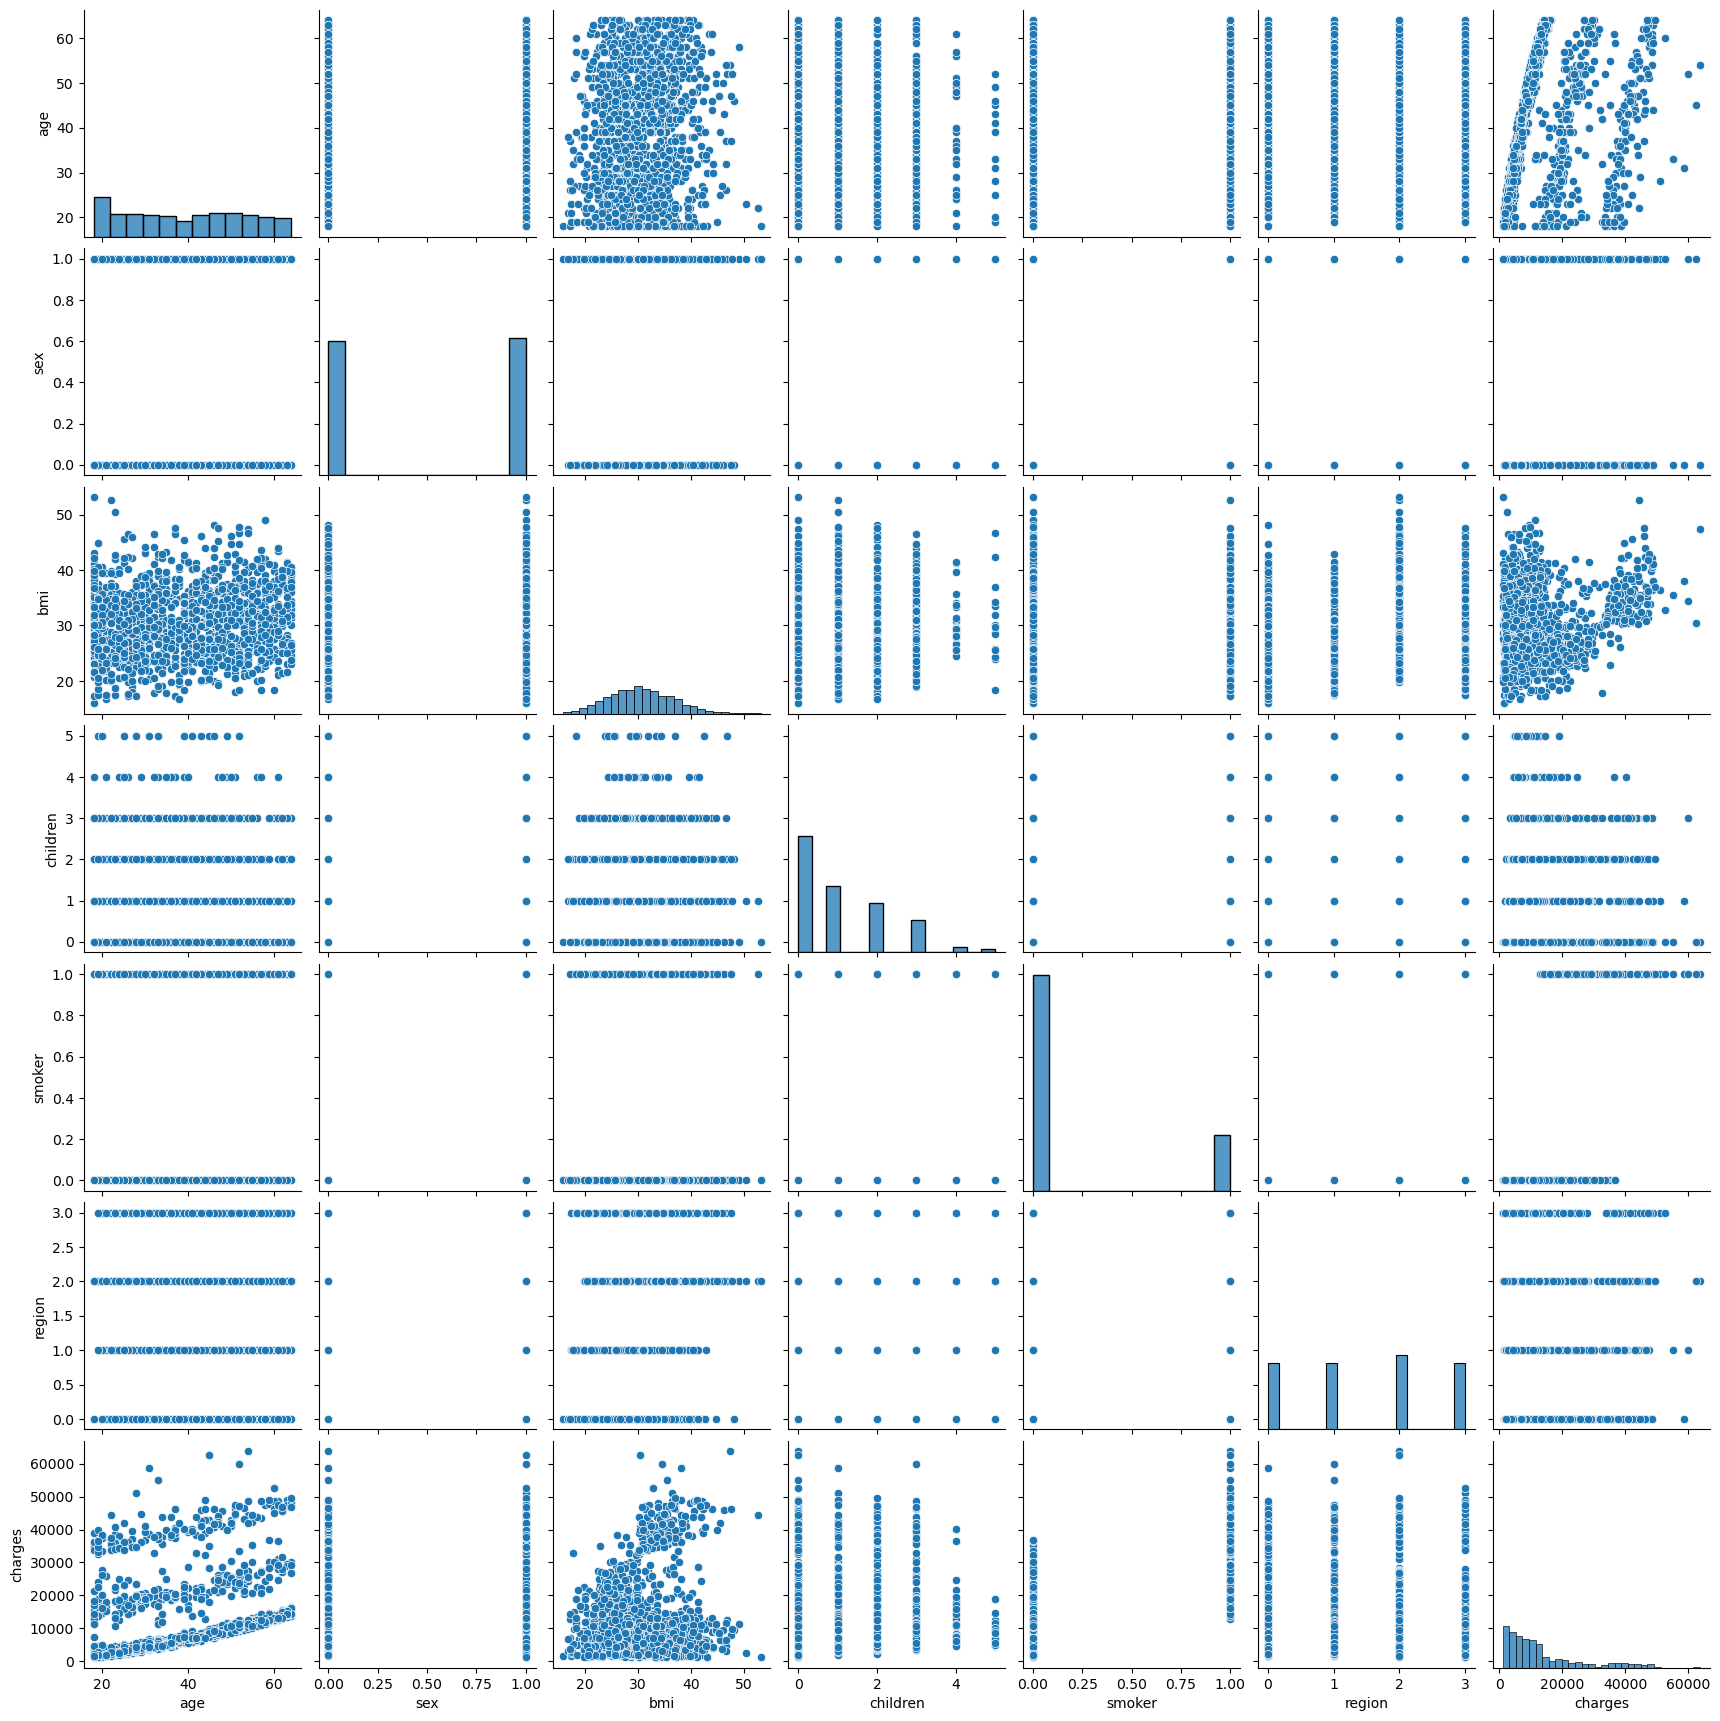

In [48]:
plt.figure(figsize=(25,50))
sns.pairplot(df)

<AxesSubplot:>

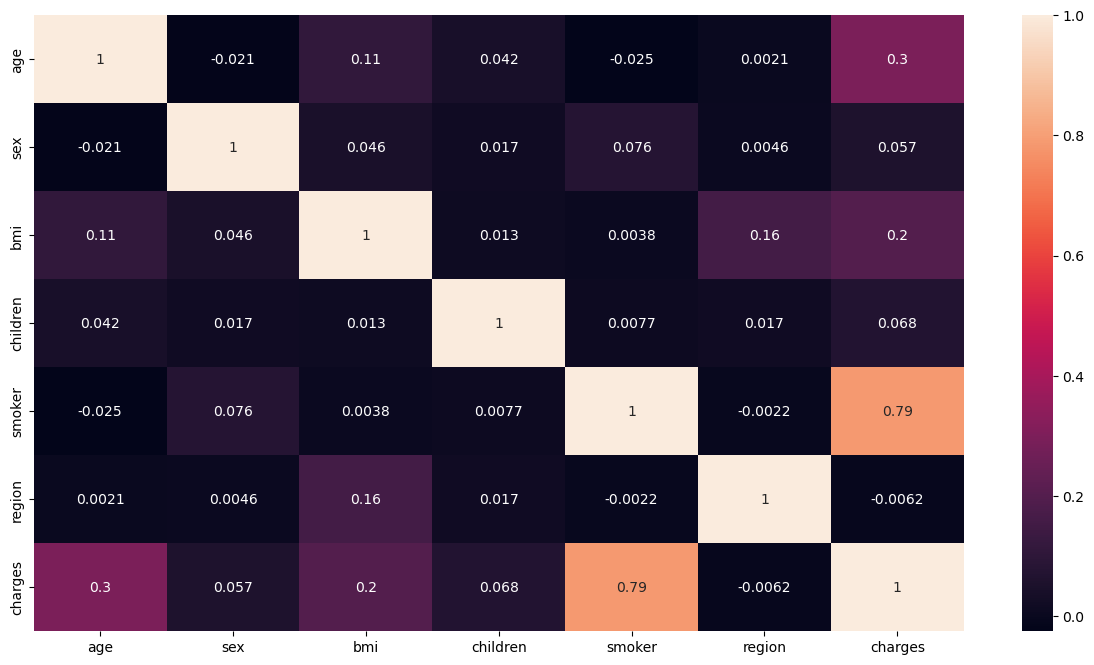

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True, )

# Preparing Data for Machine Learning

In [58]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [59]:
x=df.drop(columns =['charges'], axis=1)
y=df['charges']

In [61]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=41)

Machine Learning¶
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

Linear Regression
Random Forest Regressor
Polynomial Regression

# 1)Linear Regression

In [70]:
 Lin_reg_model=LinearRegression()
 Lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.74e+07, 
MSE test data: 3.5e+07

RMSE train data: 6.11e+03, 
RMSE test data: 6.11e+03

R2 train data: 0.766, 
R2 test data: 0.694

Model Score: 0.6940195363450499


# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3573638.903
Mean Squared Error test data: 22033743.641

RMSE train data: 1.89e+03, 
RMSE test data: 1.89e+03

R2 train data: 0.976
R2 test data: 0.774

Model Accuracy Score: 80.74053403285035


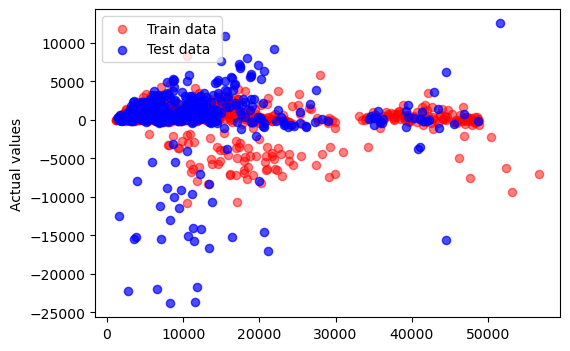

In [73]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')


# plt.xlabel("Predicted values")
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')

In [75]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [76]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.8817052533905
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.1259570334522


In [ ]:
Best Algorithm:
Based on the perfomed machine learning algorithms, it seems that the Polynomial Regression after eliminating two unimportant independent variables produces the most accurate method and will be used to predict the insurance cost for an individual.

Polynomial Regression: 88%
Random Forest Regressor: 80%
Linear Regression: 69%